# TA3 Segmentation Pipeline

This is the pipeline for EM segmentation data.

To connect, you need to do the following steps1

In [2]:
import datajoint as dj
dj.config['database.user'] = 'dimitri'
dj.config['database.host'] = 'at-database'
import ta3
nda = dj.create_virtual_module('nda', 'microns_nda')
em = dj.create_virtual_module('em', 'microns_em')
seung = dj.create_virtual_module('seung', 'microns_seung_nda')

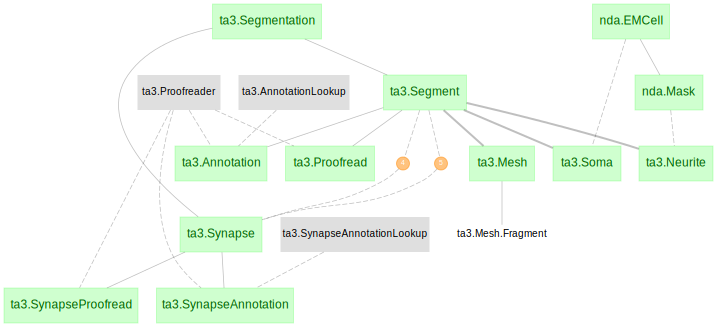

In [3]:
dj.ERD(ta3) -1 

In [ ]:
em.Synapse()

In [ ]:
ta3.Synapse()

In [ ]:
seung.Synapse().describe();

In [54]:
presyn = seung.Neuron().proj(pre_voxel_set='voxel_set', pre='id'
                            )*seung.VoxelSet().proj(presyn='boss_vset_id', pre_voxel_set='id')
postsyn = seung.Neuron().proj(post_voxel_set='voxel_set', post='id'
                            )*seung.VoxelSet().proj(postsyn='boss_vset_id', post_voxel_set='id')

In [48]:
presyn & 'presyn=3915958'

pre,presyn
3455328,3915958


In [56]:
q = seung.Synapse().proj('pre', 'post', 'voxel_set', synapse_index='id', segmentation='1') * presyn * postsyn
q

synapse_index,pre,pre_voxel_set,post,post_voxel_set,voxel_set,segmentation calculated attribute,presyn,postsyn
218,963138,1490109,666170,2394697,1064778,1,378346,10819
219,719533,1233192,859204,1467464,1052712,1,64182,203854
220,723855,1861220,680135,1783547,1099534,1,68504,24784
221,769914,2131448,657728,1616471,1079974,1,114564,2377
222,738404,1973570,804235,2067792,1058978,1,83054,148885
223,724854,1685596,682930,1561013,1075944,1,69503,27579
224,709958,2162141,673289,1151179,1098613,1,54607,17938


In [57]:
q = seung.Synapse().proj('voxel_set', 'pre', 'post', 
              synapse_index='id', segmentation='1') * (seung.VoxelSet() & 'channel=7').proj(
    voxel_set='id', 
    synapse_x='key_point_x', 
    synapse_y='key_point_y', 
    synapse_z='key_point_z') * presyn * postsyn

In [58]:
len(q)

1168480

In [29]:
seung.Neuron() * seung.VoxelSet().proj('boss_vset_id', voxel_set='id')

id,voxel_set,em_id em functional id,boss_vset_id
655351,2080910,None,0
655352,2654294,None,1
655353,2651806,None,2
2204026,2664656,None,2
655354,2372001,None,3
2204028,2664658,None,3
655355,1410066,None,4


synapse_index,voxel_set,pre,post,segmentation calculated attribute,synapse_y,synapse_x,synapse_z,presyn,postsyn
1130746,5613721,3502542,3455328,1,24964,64583,948,3963172,3915958
1130747,5613722,3544029,2360447,1,32489,54843,331,4004659,2821077
1130748,5613723,2778713,2571294,1,8181,30347,92,3239343,3031924
1130749,5613724,3075320,3076684,1,14735,63991,990,3535950,3537314
1130750,5613725,3363104,3202872,1,19422,17133,847,3823734,3663502
1130751,5613726,2896770,2757068,1,28820,39673,659,3357400,3217698
1130752,5613727,3264171,3579099,1,18178,25781,793,3724801,4039729


In [30]:
ta3.Synapse()

segmentation segmentation id,synapse_index synapse index within the segmentation,presyn segment id unique within each Segmentation,postsyn segment id unique within each Segmentation,synapse_x,synapse_y,synapse_z


In [59]:
r = q.fetch()

In [60]:
r[0]

(1130746, 5613721, 3502542, 3963172, 3455328, 3915958, 1, 24964, 64583, 948, 61948443, 61834293)

In [63]:
dict(zip(r.dtype.names, r[0]))

{'post': 3455328,
 'post_voxel_set': 3915958,
 'postsyn': 61834293,
 'pre': 3502542,
 'pre_voxel_set': 3963172,
 'presyn': 61948443,
 'segmentation': 1,
 'synapse_index': 1130746,
 'synapse_x': 64583,
 'synapse_y': 24964,
 'synapse_z': 948,
 'voxel_set': 5613721}

In [68]:
ta3.Synapse().insert(r, ignore_extra_fields=True)

In [21]:
ta3.Segment() & 'boss_vset_id=2925889'

segmentation segmentation id,segment_id segment id unique within each Segmentation,boss_vset_id IARPA's BOSS storage if applicable,key_point_x (um),key_point_y (um),key_point_z (um),x_min (um) bounding box,y_min (um) bounding box,z_min (um) bounding box,x_max (um) bounding box,y_max (um) bounding box,z_max (um) bounding box,id discard later
